#  Support Vector Machines

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pandas as pd

import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import time

### The Linear Case

Load Iris data:

Number of cases: 150	 Number of features: 4

Class names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


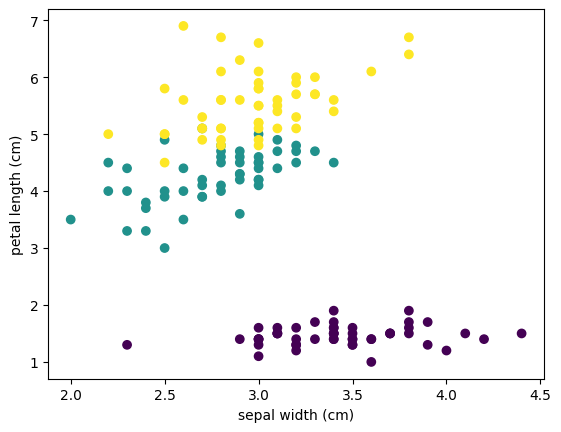

In [2]:
iris_dataset = skl.datasets.load_iris()
print("Number of cases: {}\t Number of features: {}\n".format(iris_dataset['data'].shape[0],iris_dataset['data'].shape[1]))
print("Class names: {}".format(iris_dataset['target_names']))
print("Feature names: {}".format(iris_dataset['feature_names']))
f1 = 1
f2 = 2
plt.scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],c=iris_dataset['target'])
plt.xlabel(iris_dataset['feature_names'][f1])
plt.ylabel(iris_dataset['feature_names'][f2])
plt.show()

For creating binary classification problems, we create 3 'one-vs.-rest' binary problems:

Original class labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

setosa_class:  
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



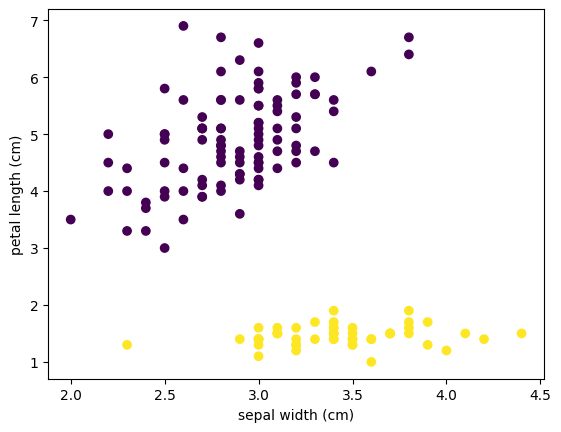

In [3]:
setosa_class = (iris_dataset['target'] == 0).astype(int)
versicolor_class = (iris_dataset['target'] == 1).astype(int)
virginica_class = (iris_dataset['target'] == 2).astype(int)

print("Original class labels: \n{}\n".format(iris_dataset['target']))
print("setosa_class:  \n{}\n".format(setosa_class))


plt.scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],c=setosa_class)
plt.xlabel(iris_dataset['feature_names'][f1])
plt.ylabel(iris_dataset['feature_names'][f2])
plt.show()

Support vectors: 
[[2.1 2.4]
 [2.1 1.5]]



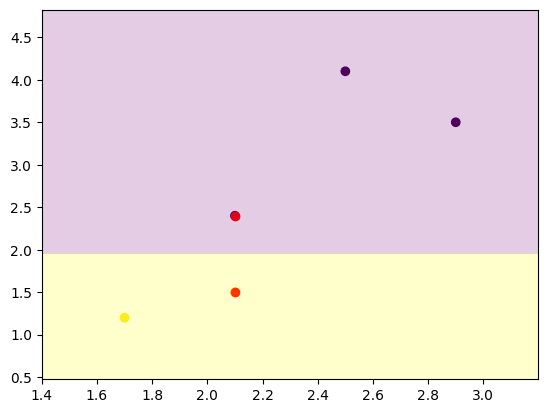

In [4]:
# data = pd.DataFrame(data={"X1": [1.7, 2.5, 2.1, 2.9, 2.1],
#                           "X2": [1.2, 4.1, 1.5, 3.5, 2.4],
#                           "y": [1, 0, 1, 0, 0]})

X = np.transpose(np.array([[1.7, 2.5, 2.1, 2.9, 2.1], [1.2, 4.1, 1.5, 3.5, 2.4]]))
y = np.array([1, 0, 1, 0, 0])

linear_svm_2 = SVC(kernel='linear',C=10.0).fit(X, y)
maxvalx = np.max(X[:, 0])
maxvaly = np.max(X[:, 1])
minvalx = np.min(X[:, 0])
minvaly = np.min(X[:, 1])
border=4
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))

meshclasses = linear_svm_2.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)

print("Support vectors: \n{}\n".format(linear_svm_2.support_vectors_))


plt.scatter(X[:, 0],X[:, 1],c=y)
plt.scatter(linear_svm_2.support_vectors_[:,0], linear_svm_2.support_vectors_[:,1], c='red')
plt.contourf(xx,yy,meshclasses,[-0.1,0.1, 1, 2],colors=('purple','yellow'),alpha=0.2)

plt.show()


Learning a linear (pure) SVM (using only 2 out of the 4 Iris features):

In [5]:
linear_svm = SVC(kernel='linear').fit(iris_dataset['data'][:,[f1,f2]],setosa_class)

Identifying and visualizing the decision regions and support vectors:

Support vectors: 
[[2.5 3. ]
 [3.4 1.9]
 [2.3 1.3]]



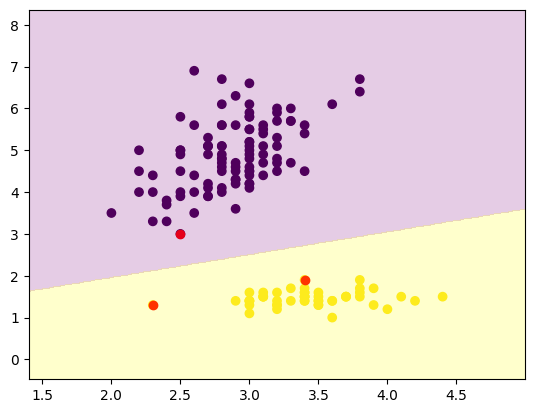

In [6]:
maxvalx = np.max(iris_dataset['data'][:,f1])
maxvaly = np.max(iris_dataset['data'][:,f2])
minvalx = np.min(iris_dataset['data'][:,f1])
minvaly = np.min(iris_dataset['data'][:,f2])
border=4
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))
      
meshclasses = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)
  



print("Support vectors: \n{}\n".format(linear_svm.support_vectors_))
plt.scatter(iris_dataset['data'][:,f1],iris_dataset['data'][:,f2],c=setosa_class)
plt.scatter(linear_svm.support_vectors_[:,0],linear_svm.support_vectors_[:,1],c='red')
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('purple','yellow'),alpha=0.2)  

plt.show()

**Exercise 1:** Manually create small datasets (just 5-10 datapoints) and learn and visualize a SVM classifier. Vary the degree of linear separability in the data: from "easily linearly separable", over "just linearly separable" to "not linearly separable". How does the SVM handle the non-linearly separable case? Some background information is found at https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation 

Support vectors: 
[[1.9 1.4]
 [1.3 1.5]]



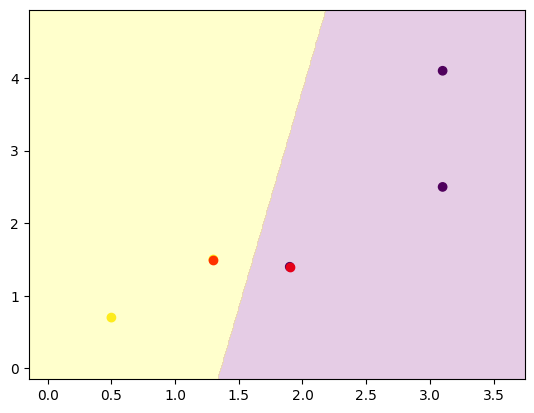

In [7]:
X = np.transpose(np.array([[0.5, 3.1, 1.3, 3.1, 1.9], [0.7, 4.1, 1.5, 2.5, 1.4]]))
y = np.array([1, 0, 1, 0, 0])

svm = SVC(kernel='linear', C=10.0).fit(X, y)
maxvalx = np.max(X[:, 0])
maxvaly = np.max(X[:, 1])
minvalx = np.min(X[:, 0])
minvaly = np.min(X[:, 1])
border=4
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))

meshclasses = svm.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)

print("Support vectors: \n{}\n".format(svm.support_vectors_))


plt.scatter(X[:, 0],X[:, 1],c=y)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='red')
plt.contourf(xx,yy,meshclasses,[-0.1,0.1, 1, 2],colors=('purple','yellow'),alpha=0.2)

plt.show()

Support vectors: 
[[1.5 1.5]
 [1.5 1.3]]



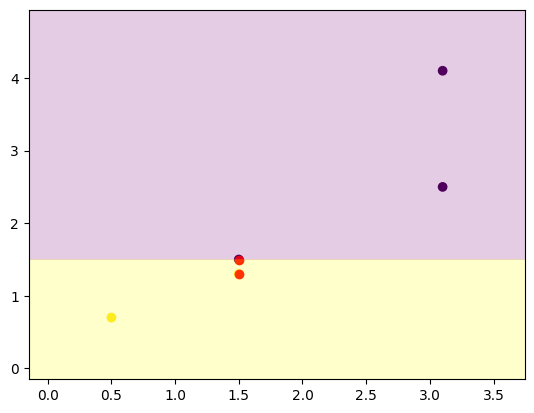

In [8]:
X = np.transpose(np.array([[0.5, 3.1, 1.5, 3.1, 1.5], [0.7, 4.1, 1.3, 2.5, 1.5]]))
y = np.array([1, 0, 1, 0, 0])

svm = SVC(kernel='linear', C=10.0).fit(X, y)
maxvalx = np.max(X[:, 0])
maxvaly = np.max(X[:, 1])
minvalx = np.min(X[:, 0])
minvaly = np.min(X[:, 1])
border=4
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))

meshclasses = svm.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)

print("Support vectors: \n{}\n".format(svm.support_vectors_))


plt.scatter(X[:, 0],X[:, 1],c=y)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='red')
plt.contourf(xx,yy,meshclasses,[-0.1,0.1, 1, 2],colors=('purple','yellow'),alpha=0.2)

plt.show()

Support vectors: 
[[3.1 2.5]
 [1.2 1.3]
 [0.5 0.7]
 [1.7 1.5]]



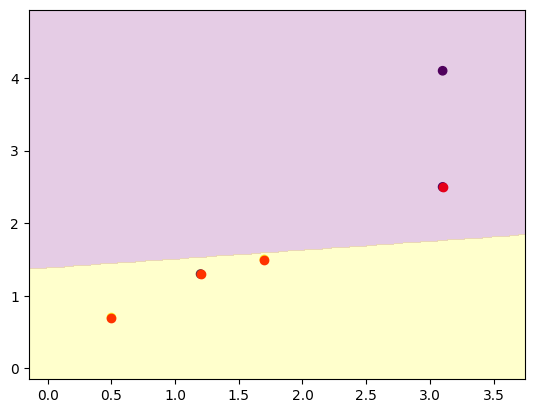

In [9]:
X = np.transpose(np.array([[0.5, 3.1, 1.7, 3.1, 1.2], [0.7, 4.1, 1.5, 2.5, 1.3]]))
y = np.array([1, 0, 1, 0, 0])

svm = SVC(kernel='linear', C=10.0).fit(X, y)
maxvalx = np.max(X[:, 0])
maxvaly = np.max(X[:, 1])
minvalx = np.min(X[:, 0])
minvaly = np.min(X[:, 1])
border=4
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))

meshclasses = svm.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)

print("Support vectors: \n{}\n".format(svm.support_vectors_))


plt.scatter(X[:, 0],X[:, 1],c=y)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='red')
plt.contourf(xx,yy,meshclasses,[-0.1,0.1, 1, 2],colors=('purple','yellow'),alpha=0.2)

plt.show()

We next test the scalability of SVC on linearly separable data. We are using 'blobs' data that looks as follows:

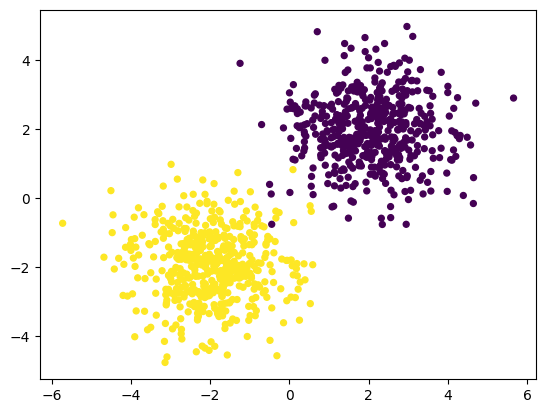

In [10]:
X, y = make_blobs(centers=np.array([[2,2],[-2,-2]]), n_samples=1000)
plt.scatter(X[:, 0], X[:, 1], c=y, s=18.0)
plt.show()

When n_samples gets large, the two generated blobs will almost surely overlap, i.e., the data is
then not linarly separable. A linear decision boundary will still be appropriate for the data, and
SVC can handle this non linearly separable data.

Now we create blobs data of varying size, and measure the time it takes to learn a linear SVM:

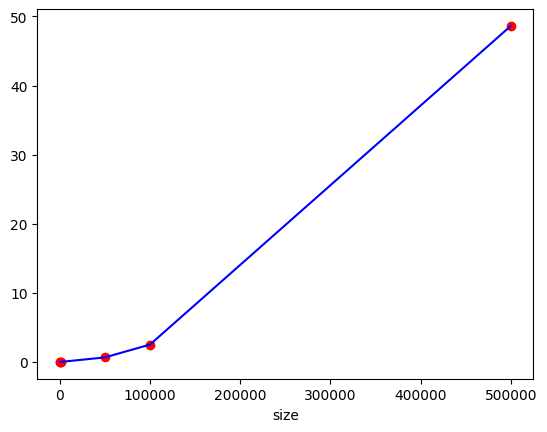

In [11]:
#sizes=np.arange(100,100000,1000)
sizes=np.array([100,500,1000,50000,100000,500000])
times=np.zeros(sizes.size)
for i,s in enumerate(sizes):
    X, y = make_blobs(centers=np.array([[2,2],[-2,-2]]), n_samples=s)
    start=time.time()
    linear_svm = SVC(kernel='linear').fit(X,y)
    end=time.time()
    times[i]=end-start 

#plt.xscale('log')
plt.xlabel('size')

plt.plot(sizes,times,'ro')
plt.plot(sizes,times,'b-')

plt.show()

**Exercise 2:** Try a larger range of datasizes (e.g. start with the commented 'sizes' array above). You may need to plot using log-scale on the x-axis. What do you observe? What happens when you change the coordinates of the blob centers (initially set to [2,2] and[-2,-2])? Why?

### Feature transformations

We load a little challenge data:


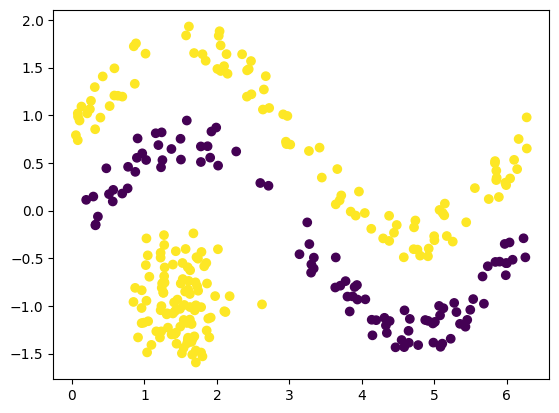

In [12]:
separateme=pd.read_csv("./data/separateme.csv")

plt.scatter(separateme['X1'],separateme['X2'],c=separateme['Y'])
#plt.scatter(separateme['X1'], np.sin(separateme['X1'])-0.3)
plt.show()

**Exercise 3**: define two feature functions phi1(X1,X2) and phi2(X1,X2) such that the separateme data becomes linearly separable in the (phi1,phi2) feature space

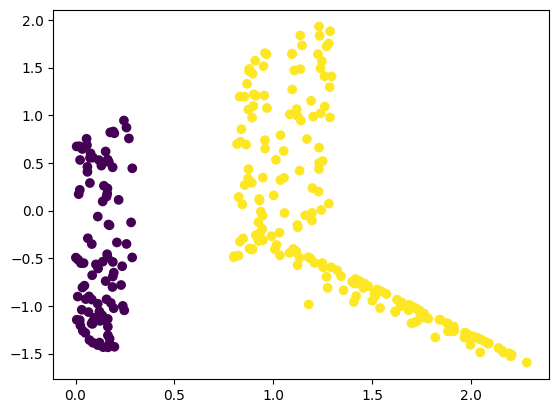

In [13]:
def phi1(X1,X2):
    return abs((np.sin(X1)-0.3) - X2)

ensemble = separateme.copy()
ensemble['X1']=phi1(ensemble['X1'],ensemble['X2'])

plt.scatter(ensemble['X1'],ensemble['X2'],c=ensemble['Y'])
plt.show()

Support vectors: 
[[ 0.28712675  0.44369157]
 [ 0.28667544 -0.49108279]
 [ 0.80152863 -0.47862555]]



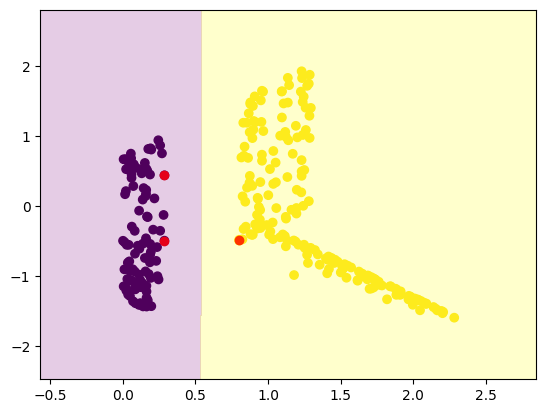

In [14]:
X = ensemble[['X1','X2']].values
y = ensemble['Y'].values

svm = SVC(kernel='linear', C=10.0).fit(X, y)
maxvalx = np.max(X[:, 0])
maxvaly = np.max(X[:, 1])
minvalx = np.min(X[:, 0])
minvaly = np.min(X[:, 1])
border=4
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))

meshclasses = svm.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)

print("Support vectors: \n{}\n".format(svm.support_vectors_))


plt.scatter(X[:, 0],X[:, 1],c=y)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='red')
plt.contourf(xx,yy,meshclasses,[-0.1,0.1, 1, 2],colors=('purple','yellow'),alpha=0.2)

plt.show()

### Kernel SVC

We now check whether a SVC with a nonlinear kernel learns to separate our data. 

We first turn the data into numpy arrays, and prepare the visualization of decision regions

In [15]:
X=separateme[["X1","X2"]].to_numpy()
Y=separateme[["Y"]].to_numpy().ravel()

In [16]:
maxvalx = np.max(X[:,0])
maxvaly = np.max(X[:,1])
minvalx = np.min(X[:,0])
minvaly = np.min(X[:,1])
border=4
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))
      

We first learn a linear model, which, of course is hopeless:

In [19]:
#model=SVC(kernel='linear').fit(X,Y)
#model=SVC(kernel='rbf').fit(X,Y)
#model=SVC(kernel='poly').fit(X,Y)
model=SVC(kernel='sigmoid').fit(X,Y)

meshclasses = model.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)

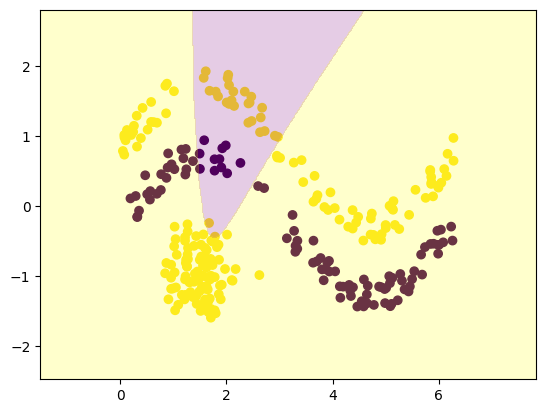

In [20]:
plt.scatter(X[:,0],X[:,1],c=Y)

plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1.0],colors=('purple','yellow'),alpha=0.2)  

plt.show()

**Exercise 4**: check whether SVC with some other kernel than "linear" can correctly classify the seperateme data.

*None*

## Self study

In this self study we perform character recognition using SVM classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [21]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='./data/')

/home/vugs/Environments/asml/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The data has .data and .target attributes. The following gives us some basic information on the data:

In [22]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe (probably -- you may check this via type(mnist.data)). The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [23]:
mnist.data=np.array(mnist.data)

We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

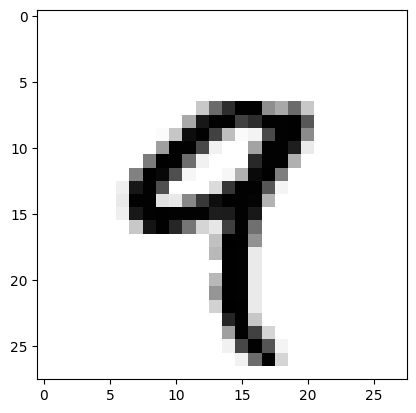

In [24]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index]))
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



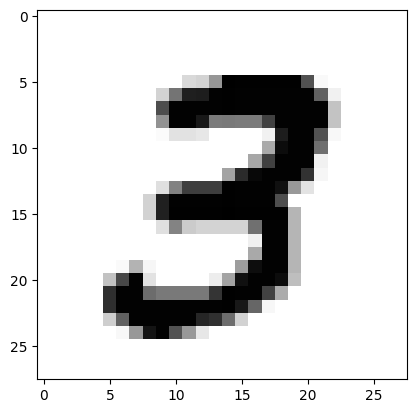

7        3
10       3
12       3
15       7
27       3
        ..
69975    3
69979    7
69986    3
69990    7
69996    3
Name: class, Length: 14434, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [25]:
digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 5 (self study):** Split the mnist_bin data into training and test set. Learn different SVM models by varying the kernel functions (SVM). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. 

You can get the current time using:

`import time` <br>
`now = time.time()`

*Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels. What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [48]:
# Split the mnist_bin data into training and test sets
import time

X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, test_size=0.3, random_state=0)

# Train the SVM
now = time.time()
linear_svm = SVC(kernel='linear').fit(X_train, y_train)
end = time.time()
print("Linear Training time: {} seconds".format(end-now))

now = time.time()
sigmoid_svm = SVC(kernel='sigmoid').fit(X_train, y_train)
end = time.time()
print("Sigmoid Training time: {} seconds".format(end-now))

now = time.time()
gaussian_svm = SVC(kernel='rbf').fit(X_train, y_train)
end = time.time()
print("Gaussian Training time: {} seconds".format(end-now))

now = time.time()
polynomial_svm = SVC(kernel='poly').fit(X_train, y_train)
end = time.time()
print("Polynomial Training time: {} seconds".format(end-now))

print("\n==============================================\n")

linear_pred = linear_svm.predict(X_test)
sigmoid_pred = sigmoid_svm.predict(X_test)
gaussian_pred = gaussian_svm.predict(X_test)
polynomial_pred = polynomial_svm.predict(X_test)

print("Linear SVM accuracy: {}".format(accuracy_score(y_test, linear_pred)))
print("Sigmoid SVM accuracy: {}".format(accuracy_score(y_test, sigmoid_pred)))
print("Gaussian SVM accuracy: {}".format(accuracy_score(y_test, gaussian_pred)))
print("Polynomial SVM accuracy: {}".format(accuracy_score(y_test, polynomial_pred)))

Linear Training time: 5.106405258178711 seconds
Sigmoid Training time: 11.567147016525269 seconds
Gaussian Training time: 5.956906318664551 seconds
Polynomial Training time: 6.338985919952393 seconds


Linear SVM accuracy: 0.979450473331794
Sigmoid SVM accuracy: 0.9561302239667513
Gaussian SVM accuracy: 0.9949203417224659
Polynomial SVM accuracy: 0.9946894481643962


Predicted: 7, Actual: 3


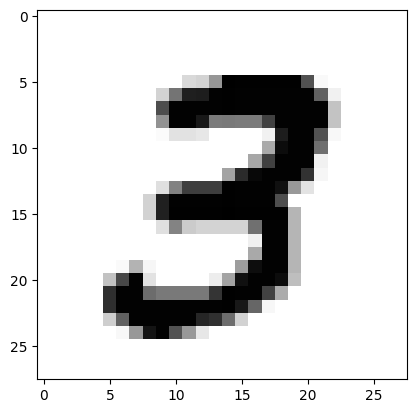

In [55]:
linear_misclass = np.where(y_test != linear_pred)
sigmoid_misclass = np.where(y_test != sigmoid_pred)
gaussian_misclass = np.where(y_test != gaussian_pred)
polynomial_misclass = np.where(y_test != polynomial_pred)

y_true = y_test.to_list()
print(f"Predicted: {linear_pred[linear_misclass[0][0]]}, Actual: {y_true[linear_misclass[0][0]]}")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

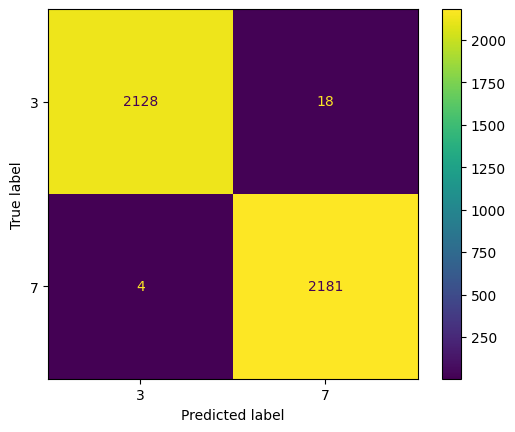

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, gaussian_pred, labels=gaussian_svm.classes_)
ConfusionMatrixDisplay(cm, display_labels=gaussian_svm.classes_).plot()

**Exercise 6 (self study):** Consider how the current data representation "presents" the digits to the classifiers, and try to improve this:<br>

**a)** Manually design feature functions for which you expect that based on your new features SVM classifiers can achieve a better accuracy than with the original features. Transform the data into your new feature space, and learn new classifiers. What accuracies do you get?

**b)** Instead of designing an explicit feature mapping as in **a)**, define a suitable measure of similarity for the digits, and implement that measure as a kernel function. (Optional: verify that the function you have defined actually satisfies the positive-semidefiniteness property.) Use your kernel function as a custom kernel for the SVC classifier.  See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example.